In [1]:
# Borrowing Code From 5_12_22_delete_X%_elecs_from_test_day\

# Hands On Session: Autoencoders, and Machine Learning
# By: Sabera Talukder

In [33]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import xarray as xr

from sklearn.decomposition import PCA

# Load Data

In [3]:
elec_loc_path = '/home/sabra/Documents/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/electrode_location_dictionary.npy'
elec_loc_dict_arr = np.load(elec_loc_path, allow_pickle=True)
elec_loc_dict = elec_loc_dict_arr.item()

In [4]:
print(elec_loc_dict['pt2'][1].shape)
print(elec_loc_dict['pt4'][1].shape)
print(elec_loc_dict['pt5'][1].shape)
print(elec_loc_dict['pt9'][1].shape)

(85, 3)
(83, 3)
(105, 3)
(125, 3)


#### Download Data for Pt2, Pt4, Pt5, Pt9 From Here:
#### https://figshare.com/articles/dataset/Naturalistic_ECoG_move_v_rest/13010546

In [5]:
# Once you have downloaded the 4 datasets from above, load the data for each day
base_path = '/home/sabra/Documents/Code/2022_new_year_new_code/ajile/htnet_data_figure_recreation/restart_5_12_22/original_data/'

In [6]:
def load_data_array(base_path, filename):
    full_data = xr.open_dataset(base_path + filename)
    full_data_array = full_data.to_array()
    data_array = full_data_array[0, :, :-1, :]
    # note rest = 1, and move = 2
    event_labels = full_data_array[0, :, -1, 0]
    
    return data_array, event_labels

In [7]:
pt2_data, pt2_labels = load_data_array(base_path, 'EC02_ecog_data.nc')
pt4_data, pt4_labels = load_data_array(base_path, 'EC04_ecog_data.nc')
pt5_data, pt5_labels = load_data_array(base_path, 'EC05_ecog_data.nc')
pt9_data, pt9_labels = load_data_array(base_path, 'EC09_ecog_data.nc')

In [8]:
print(pt2_data.shape, pt2_labels.shape)
print(pt4_data.shape, pt4_labels.shape)
print(pt5_data.shape, pt5_labels.shape)
print(pt9_data.shape, pt9_labels.shape)

(418, 86, 1001) (418,)
(536, 84, 1001) (536,)
(406, 106, 1001) (406,)
(302, 126, 1001) (302,)


# Visualize Data

In [9]:
# custom colors for each patient

colors = np.array([[216, 87, 42],
                   [187, 92, 193],
                   [115, 187, 37],
                   [6, 124, 196]])

<IPython.core.display.Javascript object>


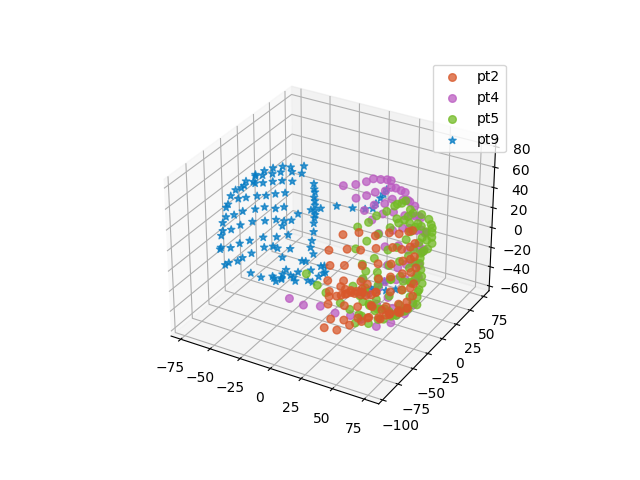

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [12]:
# Visualize the electrode data in 3d

%matplotlib notebook
ax = plt.axes(projection='3d')

for i, (key, value) in enumerate(elec_loc_dict.items()):
    if value[0] == 'R':
        m = 'o'
    elif value[0] == 'L':
        m ='*'    
    _ = ax.scatter3D(value[1][:, 0], value[1][:, 1], value[1][:, 2], c=colors[i]/255, alpha=0.75, s=30, marker=m)
    
_ = ax.legend(['pt2', 'pt4', 'pt5', 'pt9'])

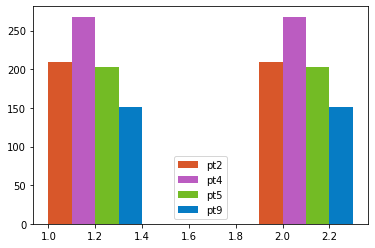

In [13]:
%matplotlib inline

# Visualize Labels

offset = 0.1
_ = plt.hist(pt2_labels, color=colors[0]/255)
_ = plt.hist(pt4_labels + 1*offset, color=colors[1]/255)
_ = plt.hist(pt5_labels + 2*offset, color=colors[2]/255)
_ = plt.hist(pt9_labels + 3*offset, color=colors[3]/255)
_ = plt.legend(['pt2', 'pt4', 'pt5', 'pt9'])
_ = plt.show()

In [14]:
def separate_data_by_labels(data, labels):
    ones = []
    twos = []
    
    for idx, l in enumerate(labels):
        if l == 1:
            ones.append(data[i, :, :])
        elif l == 2:
            twos.append(data[i, :, :])
            
    return np.array(ones), np.array(twos)

In [16]:
pt2_ones, pt2_twos = separate_data_by_labels(pt2_data, pt2_labels)

In [17]:
print(pt2_ones.shape, pt2_twos.shape)

(209, 86, 1001) (209, 86, 1001)


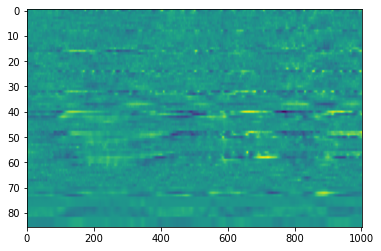

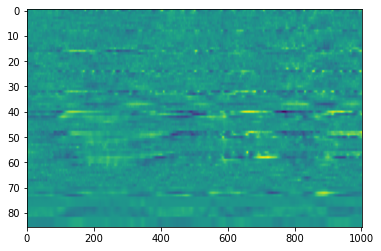

In [23]:
_ = plt.imshow(np.mean(pt2_ones, axis=0), aspect='auto')
_ = plt.show()

_ = plt.imshow(np.mean(pt2_twos, axis=0), aspect='auto')

In [ ]:
# we can also show how do we share the same representation since all patients have different numbers of electrodes

In [30]:
pt2_ones_flat = pt2_ones.reshape(209, -1)
pt2_twos_flat = pt2_twos.reshape(209, -1)

pt2_all_flat = np.vstack((pt2_ones_flat, pt2_twos_flat))

In [31]:
pt2_all_flat.shape

(418, 86086)

In [38]:
# make a PCA model with with S = 3
pca_model_s_3 = PCA(n_components=3)

# STOP & Check Yourself: Do you know why we can just call "PCA"?

# with the PCA model instance we created to our neural data
neural_pca_s_3 = pca_model_s_3.fit_transform(pt2_all_flat)

/home/sabra/Downloads/enter/envs/htnet/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


In [39]:
neural_pca_s_3.shape

(418, 3)

In [43]:
neural_pca_s_3

array([[ 1.01200856e-10, -1.32587193e-28,  5.64267301e-40],
       [ 1.01200856e-10, -1.32587193e-28, -2.35861328e-42],
       [ 1.01200856e-10, -1.32587193e-28, -1.47096515e-42],
       ...,
       [ 1.01200856e-10, -1.32587193e-28, -1.47096515e-42],
       [ 1.01200856e-10, -1.32587193e-28, -1.47096515e-42],
       [ 1.01200856e-10,  1.49745536e-27,  1.71052987e-55]])

<IPython.core.display.Javascript object>


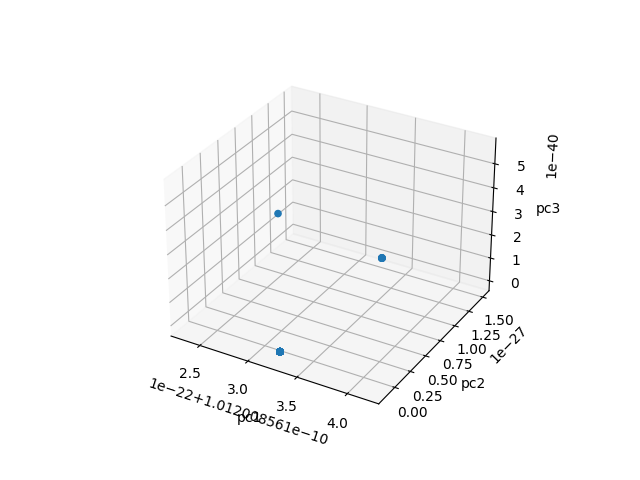

In [44]:
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = neural_pca_s_3[0:209, 0]
pc2 = neural_pca_s_3[0:209, 1]
pc3 = neural_pca_s_3[0:209, 2]

ax.scatter3D(pc1, pc2, pc3)

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

# Implement autoencoder using data from all 4 patients